#Initial

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Data
# Assuming your data is stored in a CSV file.
df = pd.read_csv('/content/fitness_whole_data.csv')
df.head(5)

,Name,gender,age,weight,dream_weight,height,workout_type,BMI,Dream BMI,Dream BMI Status,...,exercise,wellness_activity,food_intake,water_intake,Question1,Question2,Question3,Question4,Question5,Question6
0,Durai,male,48,70,65,170,gym,24.221453,22.491349,Good to go!,...,"Strength training, elliptical","Nature time, light meditation","Balanced meals with fruits, veggies, proteins",2.5 liters,1,0,1,1,1,1
1,Sridhar,male,38,85,70,170,gym,29.411765,24.221453,Good to go!,...,"CrossFit style workouts, bike sprints",Mindfulness practices,"High-fiber foods, low-cal proteins",3 liters,1,0,1,1,1,0
2,Dakchinamoorthy,male,25,55,65,165,cardio/home_workout,20.202020,23.875115,Good to go!,...,"Home Pilates, jogging",Guided stretching sessions,"Fresh fruits, lean protein snacks",2.5 liters,1,0,2,1,1,1
3,Mani,male,40,75,65,165,cardio/home_workout,27.548209,23.875115,Good to go!,...,"Interval walking, resistance band exercises","Guided relaxation, light reading","Fresh salads, low-carb vegetables, nuts",3 liters,1,1,1,1,1,1
4,Aravindan,male,45,75,68,170,cardio/home_workout,25.951557,23.529412,Good to go!,...,"At-home HIIT, light jogging","Relaxation, deep breathing","Low-sugar fruits, green veggies, protein snacks",3 liters,1,1,2,0,1,1


<Axes: >

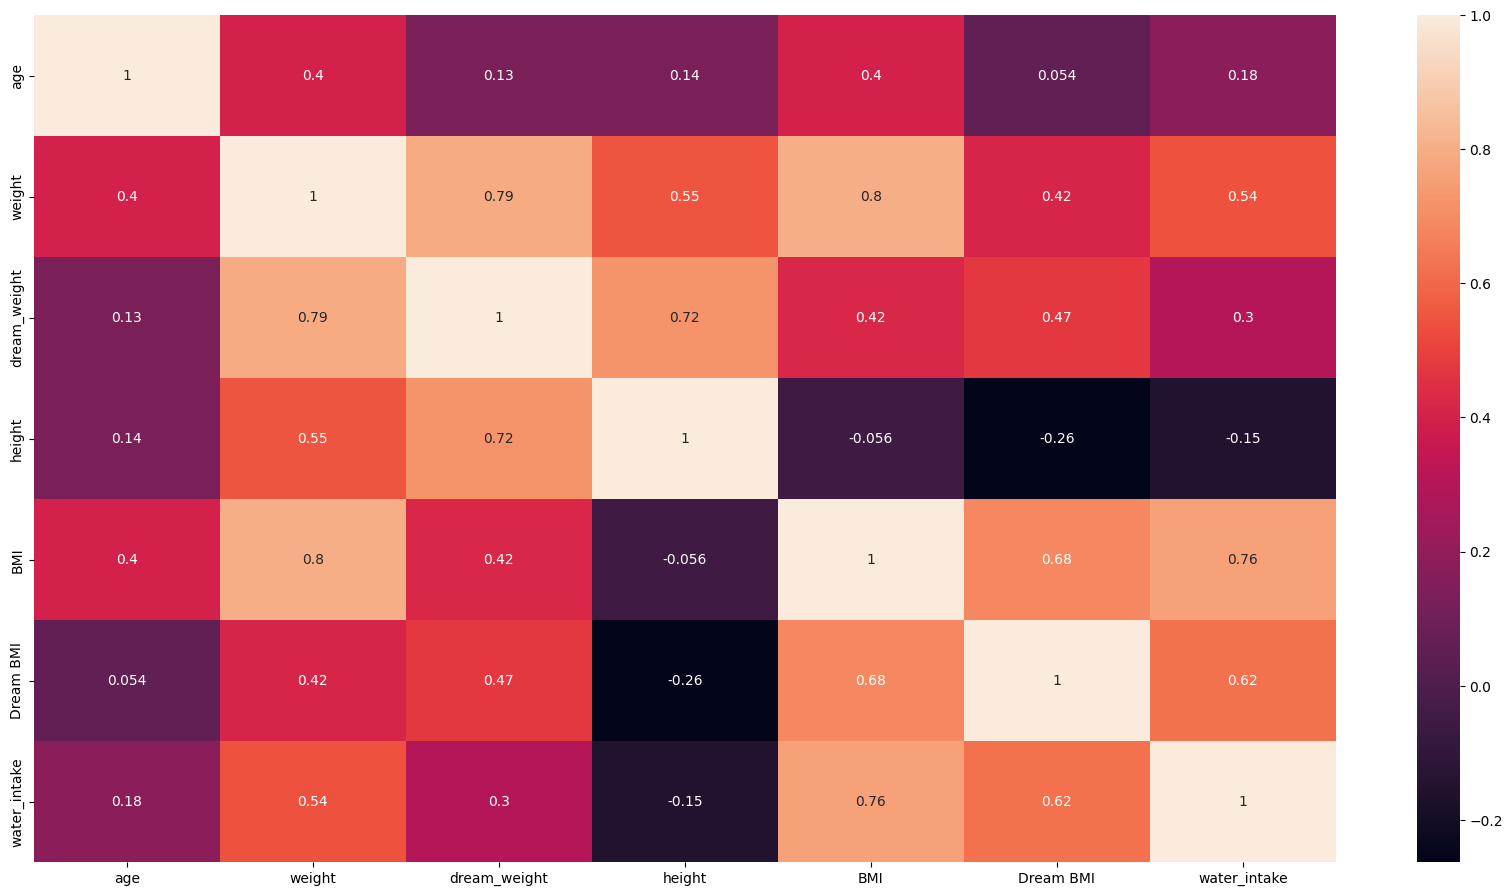

In [ ]:
plt.figure(figsize = (21, 11))
#date_columns = ['D.O.A', 'D.O.D','month year','MRD No.']
numeric_columns = df.select_dtypes(include=['number']).columns
#numeric_columns = ndata.drop(columns=date_columns)
correlation = df[numeric_columns].corr()
sns.heatmap(correlation, annot = True)

#try Code

In [ ]:
# Encode categorical features
label_encoders = {}
for column in ['gender','exercise', 'wellness_activity', 'food_intake','workout_type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
df

,gender,age,weight,dream_weight,height,workout_type,BMI,Dream BMI,Current BMI category,exercise,wellness_activity,food_intake,water_intake
0,1,48,70,65,170,1,24.221453,22.491349,normal,25,22,1,2
1,1,38,85,70,170,1,29.411765,24.221453,overweight,5,17,14,3
2,1,25,55,65,165,0,20.202020,23.875115,normal,12,10,4,2
3,1,40,75,65,165,0,27.548209,23.875115,overweight,15,9,6,3
4,1,45,75,68,170,0,25.951557,23.529412,overweight,0,26,20,3
5,1,40,80,70,180,1,24.691358,21.604938,normal,25,24,23,2
6,1,42,75,65,170,1,25.951557,22.491349,overweight,26,27,16,3
7,1,38,75,65,175,1,24.489796,21.224490,normal,21,6,25,2
8,1,35,78,65,170,0,26.989619,22.491349,overweight,7,25,26,3
9,1,32,75,65,175,0,24.489796,21.224490,normal,17,19,29,2


<Axes: >

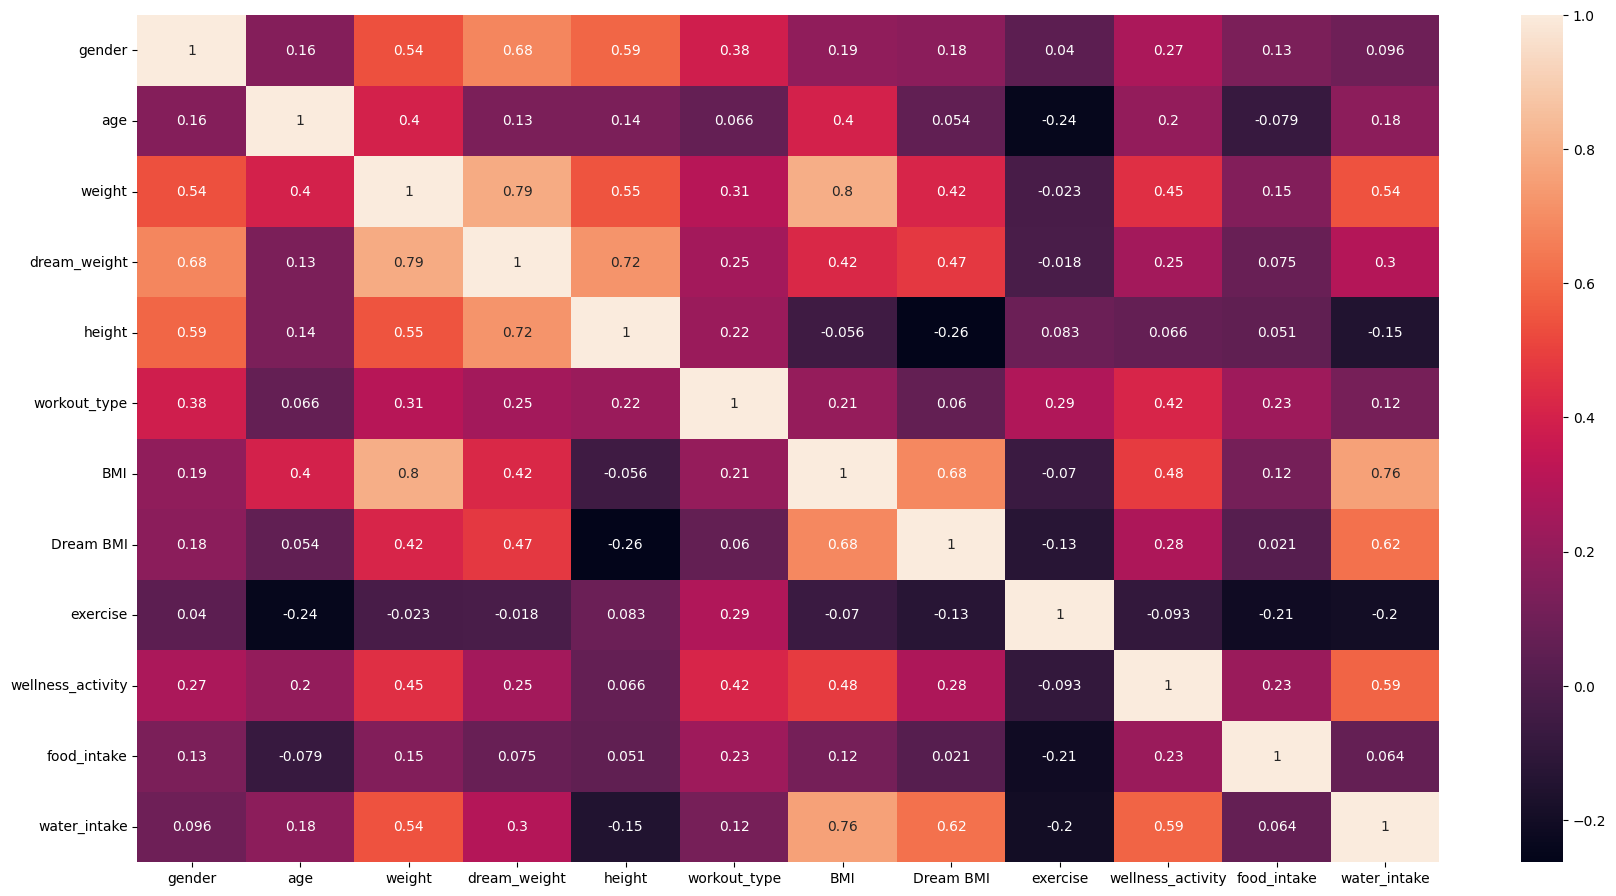

In [ ]:
plt.figure(figsize = (21, 11))
#date_columns = ['D.O.A', 'D.O.D','month year','MRD No.']
numeric_columns = df.select_dtypes(include=['number']).columns
#numeric_columns = ndata.drop(columns=date_columns)
correlation = df[numeric_columns].corr()
sns.heatmap(correlation, annot = True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Separate inputs and outputs
X = df[['age','gender','weight','dream_weight','height','BMI','Dream BMI','workout_type']]
y = df[['exercise', 'wellness_activity', 'food_intake','water_intake']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train multi-output models
# For classification targets
clf_exercise = DecisionTreeClassifier()
clf_wellness = DecisionTreeClassifier()
clf_food = DecisionTreeClassifier()

# Train each classifier
clf_exercise.fit(X_train, y_train['exercise'])
clf_wellness.fit(X_train, y_train['wellness_activity'])
clf_food.fit(X_train, y_train['food_intake'])

# Combine classifiers into a multi-output classifier
multi_target_clf = MultiOutputClassifier(DecisionTreeClassifier())
multi_target_clf.fit(X_train, y_train[['exercise', 'wellness_activity', 'food_intake']])

# Predict and evaluate classification models
pred_exercise, pred_wellness, pred_food = multi_target_clf.predict(X_test).T

accuracy_exercise = accuracy_score(y_test['exercise'], pred_exercise)
accuracy_wellness = accuracy_score(y_test['wellness_activity'], pred_wellness)
accuracy_food = accuracy_score(y_test['food_intake'], pred_food)

print("Exercise Classification Accuracy:", accuracy_exercise)
print("Wellness Activity Classification Accuracy:", accuracy_wellness)
print("Food Intake Classification Accuracy:", accuracy_food)

Exercise Classification Accuracy: 0.14285714285714285
Wellness Activity Classification Accuracy: 0.21428571428571427
Food Intake Classification Accuracy: 0.21428571428571427


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Separate inputs and outputs
X = df[['age','gender','BMI','weight','height','dream_weight','Dream BMI','workout_type']]
y = df[['exercise']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
xgb_clf = XGBClassifier(random_state=42)

In [ ]:
# Train and evaluate Random Forest classifier
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("Random Forest Classification Report")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          15       1.00      0.33      0.50         3
          18       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         0
          22       0.67      1.00      0.80         4
          23       1.00      1.00      1.00         1
          24       0.00      0.00      0.00         2
          25       1.00      1.00      1.00         1
          26       1.00      1.00      1.00         2

    accuracy                           0.73        22
   macro avg       0.71      0.69      0.69 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and 

In [ ]:
# Train and evaluate SVM classifier
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
print("SVM Classification Report")
print(classification_report(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))

SVM Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           8       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          15       0.50      0.33      0.40         3
          18       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         2
          22       0.50      1.00      0.67         4
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         1
          26       0.40      1.00      0.57         2

    accuracy                           0.41        22
   macro avg       0.19      0.29      0.22        22


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X = df[['age', 'weight', 'height','workout_type']]
y = df[['exercise', 'wellness_activity', 'food_intake']]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize RandomForestClassifier with basic parameters
rf_classifier = RandomForestClassifier(random_state=42)

# Multi-output classifier wrapping RandomForestClassifier
multi_target_clf = MultiOutputClassifier(rf_classifier)

# Train the model on the training data
multi_target_clf.fit(X_train, y_train[['exercise', 'wellness_activity', 'food_intake']])

# Predict the test set
pred_exercise, pred_wellness, pred_food = multi_target_clf.predict(X_test).T

# Evaluate each output's accuracy
accuracy_exercise = accuracy_score(y_test['exercise'], pred_exercise)
accuracy_wellness = accuracy_score(y_test['wellness_activity'], pred_wellness)
accuracy_food = accuracy_score(y_test['food_intake'], pred_food)

print("Exercise Classification Accuracy:", accuracy_exercise)
print("Wellness Activity Classification Accuracy:", accuracy_wellness)
print("Food Intake Classification Accuracy:", accuracy_food)

# Optional: Tune Random Forest Hyperparameters to improve performance
param_grid = {
    'estimator__n_estimators': [50, 100, 150],
    'estimator__max_depth': [10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10]
}

# Grid search for best parameters
grid_search = GridSearchCV(multi_target_clf, param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train[['exercise', 'wellness_activity', 'food_intake']])

# Use the best model found by GridSearch
best_model = grid_search.best_estimator_

# Predict with the optimized model
pred_exercise_opt, pred_wellness_opt, pred_food_opt = best_model.predict(X_test).T

# Evaluate again with the optimized model
accuracy_exercise_opt = accuracy_score(y_test['exercise'], pred_exercise_opt)
accuracy_wellness_opt = accuracy_score(y_test['wellness_activity'], pred_wellness_opt)
accuracy_food_opt = accuracy_score(y_test['food_intake'], pred_food_opt)

print("\nOptimized Exercise Classification Accuracy:", accuracy_exercise_opt)
print("Optimized Wellness Activity Classification Accuracy:", accuracy_wellness_opt)
print("Optimized Food Intake Classification Accuracy:", accuracy_food_opt)


Exercise Classification Accuracy: 0.7037037037037037
Wellness Activity Classification Accuracy: 0.7037037037037037
Food Intake Classification Accuracy: 0.7037037037037037


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 220, in accuracy_scor


Optimized Exercise Classification Accuracy: 0.7777777777777778
Optimized Wellness Activity Classification Accuracy: 0.7777777777777778
Optimized Food Intake Classification Accuracy: 0.7037037037037037


#Random Sampling

In [ ]:
df = pd.read_csv('/content/fitness_whole_data.csv')
df = df.drop(columns=['Name','Current BMI category','Dream BMI Status','Age Category','Question1','Question2','Question3','Question4','Question5','Question6'])
df['water_intake'] = df['water_intake'].str.extract('(\d+)').astype(int)
# Encode categorical features
label_encoders = {}
for column in ['gender','exercise', 'wellness_activity', 'food_intake','workout_type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
df.head(5)

,gender,age,weight,dream_weight,height,workout_type,BMI,Dream BMI,exercise,wellness_activity,food_intake,water_intake
0,1,48,70,65,170,1,24.221453,22.491349,25,22,1,2
1,1,38,85,70,170,1,29.411765,24.221453,5,17,14,3
2,1,25,55,65,165,0,20.202020,23.875115,12,10,4,2
3,1,40,75,65,165,0,27.548209,23.875115,15,9,6,3
4,1,45,75,68,170,0,25.951557,23.529412,0,26,20,3


In [ ]:
X = df[['gender','age','weight','dream_weight','height','workout_type','BMI','Dream BMI']]
y = df[['exercise', 'wellness_activity', 'food_intake','water_intake']]

In [ ]:
# Number of additional rows you want to add
num_additional_rows = 57

# Sample with replacement to generate additional rows
df_additional = df.sample(n=num_additional_rows, replace=True, random_state=1)

# Append additional rows to the original DataFrame
df_combined = pd.concat([df, df_additional], ignore_index=True)

# Print the shapes of the original and combined DataFrames
print("Original DataFrame shape:", df.shape)
print("Combined DataFrame shape:", df_combined.shape)

print("\nCombined DataFrame:")
print(df_combined)

Original DataFrame shape: (53, 12)
Combined DataFrame shape: (110, 12)

Combined DataFrame:
     gender  age  weight  dream_weight  height  workout_type        BMI  \
0         1   48      70            65     170             1  24.221453   
1         1   38      85            70     170             1  29.411765   
2         1   25      55            65     165             0  20.202020   
3         1   40      75            65     165             0  27.548209   
4         1   45      75            68     170             0  25.951557   
..      ...  ...     ...           ...     ...           ...        ...   
105       1   40      75            65     165             0  27.548209   
106       1   42      75            65     170             1  25.951557   
107       0   36      51            53     153             0  21.786492   
108       0   24      68            58     158             1  27.239224   
109       1   40      75            65     165             0  27.548209   

     Dr

In [ ]:
#df_combined.to_csv("combine1.csv", index=False)
df=df_combined

# With Collected data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE  # Optional, if using SMOTE to handle class imbalance

# Separate inputs and outputs
X = df[['age', 'gender', 'weight', 'dream_weight', 'height', 'BMI', 'Dream BMI', 'workout_type']]
y = df[['exercise', 'wellness_activity', 'food_intake', 'water_intake']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Define base RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid for optimization
param_grid = {
    'n_estimators': [100, 200],  # Reduced to speed up fitting
    'max_depth': [10, 20],       # Reduced depth range for speed
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Use StratifiedKFold to ensure balanced splits
cv = StratifiedKFold(n_splits=3)

# Multi-output classifier with RandomForestClassifier and GridSearchCV
multi_target_rf = MultiOutputClassifier(GridSearchCV(rf, param_grid, cv=cv, verbose=1, n_jobs=1))  # Set n_jobs=1

# Train the model
multi_target_rf.fit(X_train, y_train)

# Predict and evaluate classification models
y_pred = multi_target_rf.predict(X_test)

# Separate predictions for each target variable
pred_exercise, pred_wellness, pred_food, pred_water = y_pred.T

# Evaluate accuracy for each target
accuracy_exercise = accuracy_score(y_test['exercise'], pred_exercise)
accuracy_wellness = accuracy_score(y_test['wellness_activity'], pred_wellness)
accuracy_food = accuracy_score(y_test['food_intake'], pred_food)
accuracy_water = accuracy_score(y_test['water_intake'], pred_water)

# Output classification accuracies
print("Exercise Classification Accuracy:", accuracy_exercise)
print("Wellness Activity Classification Accuracy:", accuracy_wellness)
print("Food Intake Classification Accuracy:", accuracy_food)
print("Water Intake Classification Accuracy:", accuracy_water)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Exercise Classification Accuracy: 0.21428571428571427
Wellness Activity Classification Accuracy: 0.2857142857142857
Food Intake Classification Accuracy: 0.21428571428571427
Water Intake Classification Accuracy: 1.0


# With collected and duplicated

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE  # Optional, if using SMOTE to handle class imbalance

# Separate inputs and outputs
X = df[['age', 'gender', 'weight', 'dream_weight', 'height', 'BMI', 'Dream BMI', 'workout_type']]
y = df[['exercise', 'wellness_activity', 'food_intake', 'water_intake']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Define base RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid for optimization
param_grid = {
    'n_estimators': [100, 200],  # Reduced to speed up fitting
    'max_depth': [10, 20],       # Reduced depth range for speed
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Use StratifiedKFold to ensure balanced splits
cv = StratifiedKFold(n_splits=3)

# Multi-output classifier with RandomForestClassifier and GridSearchCV
multi_target_rf = MultiOutputClassifier(GridSearchCV(rf, param_grid, cv=cv, verbose=1, n_jobs=1))  # Set n_jobs=1

# Train the model
multi_target_rf.fit(X_train, y_train)

# Predict and evaluate classification models
y_pred = multi_target_rf.predict(X_test)

# Separate predictions for each target variable
pred_exercise, pred_wellness, pred_food, pred_water = y_pred.T

# Evaluate accuracy for each target
accuracy_exercise = accuracy_score(y_test['exercise'], pred_exercise)
accuracy_wellness = accuracy_score(y_test['wellness_activity'], pred_wellness)
accuracy_food = accuracy_score(y_test['food_intake'], pred_food)
accuracy_water = accuracy_score(y_test['water_intake'], pred_water)

# Output classification accuracies
print("Exercise Classification Accuracy:", accuracy_exercise)
print("Wellness Activity Classification Accuracy:", accuracy_wellness)
print("Food Intake Classification Accuracy:", accuracy_food)
print("Water Intake Classification Accuracy:", accuracy_water)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Exercise Classification Accuracy: 0.7777777777777778
Wellness Activity Classification Accuracy: 0.7037037037037037
Food Intake Classification Accuracy: 0.7777777777777778
Water Intake Classification Accuracy: 1.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Separate inputs and outputs
X = df[['age','gender','weight','dream_weight','height','BMI','Dream BMI','workout_type']]
y = df[['exercise', 'wellness_activity', 'food_intake','water_intake']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train multi-output models
# For classification targets
clf_exercise = DecisionTreeClassifier()
clf_wellness = DecisionTreeClassifier()
clf_food = DecisionTreeClassifier()

# Train each classifier
clf_exercise.fit(X_train, y_train['exercise'])
clf_wellness.fit(X_train, y_train['wellness_activity'])
clf_food.fit(X_train, y_train['food_intake'])

# Combine classifiers into a multi-output classifier
multi_target_clf = MultiOutputClassifier(DecisionTreeClassifier())
multi_target_clf.fit(X_train, y_train[['exercise', 'wellness_activity', 'food_intake']])

# Predict and evaluate classification models
pred_exercise, pred_wellness, pred_food = multi_target_clf.predict(X_test).T

accuracy_exercise = accuracy_score(y_test['exercise'], pred_exercise)
accuracy_wellness = accuracy_score(y_test['wellness_activity'], pred_wellness)
accuracy_food = accuracy_score(y_test['food_intake'], pred_food)

print("Exercise Classification Accuracy:", accuracy_exercise)
print("Wellness Activity Classification Accuracy:", accuracy_wellness)
print("Food Intake Classification Accuracy:", accuracy_food)

Exercise Classification Accuracy: 0.8518518518518519
Wellness Activity Classification Accuracy: 0.7777777777777778
Food Intake Classification Accuracy: 0.7777777777777778


# Final Models With collected and random generated within

## Random Forest

In [ ]:
#Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE  # Optional, if using SMOTE to handle class imbalance

# Separate inputs and outputs
X = df[['age', 'gender', 'weight', 'dream_weight', 'height', 'BMI', 'Dream BMI', 'workout_type']]
y = df[['exercise', 'wellness_activity', 'food_intake', 'water_intake']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize classifiers
rf_clf = RandomForestClassifier(random_state=42)
# Train and evaluate Random Forest classifier
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

# Separate predictions for each target variable
pred_exercise, pred_wellness, pred_food, pred_water = rf_pred.T

# Evaluate accuracy for each target
accuracy_exercise = accuracy_score(y_test['exercise'], pred_exercise)
accuracy_wellness = accuracy_score(y_test['wellness_activity'], pred_wellness)
accuracy_food = accuracy_score(y_test['food_intake'], pred_food)
accuracy_water = accuracy_score(y_test['water_intake'], pred_water)

# Output classification accuracies
print("Exercise Classification Accuracy:", accuracy_exercise)
print("Wellness Activity Classification Accuracy:", accuracy_wellness)
print("Food Intake Classification Accuracy:", accuracy_food)
print("Water Intake Classification Accuracy:", accuracy_water)

Exercise Classification Accuracy: 0.7857142857142857
Wellness Activity Classification Accuracy: 0.7857142857142857
Food Intake Classification Accuracy: 0.75
Water Intake Classification Accuracy: 1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Separate inputs and outputs
X = df[['age', 'gender', 'weight', 'dream_weight', 'height', 'BMI', 'Dream BMI', 'workout_type']]
y = df[['exercise', 'wellness_activity', 'food_intake', 'water_intake']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_clf.fit(X_train, y_train)

# Predict on the test data
rf_pred = rf_clf.predict(X_test)

# Separate predictions for each target variable
pred_exercise, pred_wellness, pred_food, pred_water = rf_pred.T

# Initialize lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Evaluate performance for each target
targets = ['exercise', 'wellness_activity', 'food_intake', 'water_intake']
for target, y_true, y_pred in zip(targets, [y_test['exercise'], y_test['wellness_activity'], y_test['food_intake'], y_test['water_intake']],
                                  [pred_exercise, pred_wellness, pred_food, pred_water]):

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Precision, Recall, and F1 Score
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print per-class metrics
    print(f"{target} Classification Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

# Calculate overall (macro average) metrics
overall_accuracy = np.mean(accuracies)
overall_precision = np.mean(precisions)
overall_recall = np.mean(recalls)
overall_f1 = np.mean(f1_scores)

# Print overall metrics
print("Overall Classification Metrics (Average for all targets):")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")


exercise Classification Metrics:
Accuracy: 0.7857
Precision: 0.7369
Recall: 0.7857
F1 Score: 0.7451

wellness_activity Classification Metrics:
Accuracy: 0.7857
Precision: 0.7905
Recall: 0.7857
F1 Score: 0.7808

food_intake Classification Metrics:
Accuracy: 0.7500
Precision: 0.6738
Recall: 0.7500
F1 Score: 0.7020

water_intake Classification Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Overall Classification Metrics (Average for all targets):
Overall Accuracy: 0.8304
Overall Precision: 0.8003
Overall Recall: 0.8304
Overall F1 Score: 0.8070


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_absolute_error, mean_squared_error, confusion_matrix, r2_score
)
import numpy as np

# Function to evaluate and print classification and error metrics
def evaluate_metrics(y_true, y_pred, label):
    # Classification Metrics
    #accuracy = accuracy_score(y_true, y_pred)
    #precision = precision_score(y_true, y_pred, average='micro')
    #recall = recall_score(y_true, y_pred, average='micro')
    #f1 = f1_score(y_true, y_pred, average='micro')

    # Confusion Matrix and True/False Positives/Negatives
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel() if conf_matrix.size == 4 else (None, None, None, None)

    # Error Metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Print metrics
    #print(f"\n{label} Classification and Error Metrics:")
    #print(f"Accuracy: {accuracy}")
    #print(f"Precision: {precision}")
    #print(f"Recall: {recall}")
    #print(f"F1 Score: {f1}")
    if tn is not None and fp is not None and fn is not None and tp is not None:
        print(f"True Negatives (TN): {tn}, False Positives (FP): {fp}")
        print(f"False Negatives (FN): {fn}, True Positives (TP): {tp}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")

# Evaluate for each target variable
evaluate_metrics(y_test['exercise'], pred_exercise, 'Exercise')
evaluate_metrics(y_test['wellness_activity'], pred_wellness, 'Wellness Activity')
evaluate_metrics(y_test['food_intake'], pred_food, 'Food Intake')
evaluate_metrics(y_test['water_intake'], pred_water, 'Water Intake')

Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]
Mean Absolute Error (MAE): 2.5714285714285716
Mean Squared Error (MSE): 37.642857142857146
Root Mean Squared Error (RMSE): 6.135377506140689
R-squared (R²): 0.4395639871626883
Confusion Matrix:
[[4 0 0 

In [ ]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
)
import numpy as np
import pandas as pd

# Function to evaluate and print classification and error metrics for each target
def evaluate_metrics(y_true, y_pred, label):
    # Confusion Matrix and True/False Positives/Negatives
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel() if conf_matrix.size == 4 else (None, None, None, None)

    # Error Metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    '''# Print metrics
    print(f"\n{label} Classification and Error Metrics:")
    if tn is not None and fp is not None and fn is not None and tp is not None:
        print(f"True Negatives (TN): {tn}, False Positives (FP): {fp}")
        print(f"False Negatives (FN): {fn}, True Positives (TP): {tp}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")'''

    return mae, mse, rmse, r2

# Assuming y_test and y_pred DataFrames have columns: 'exercise', 'wellness_activity', 'food_intake', 'water_intake'
# Individual Evaluation and Storing Results
results = {}
for label, y_col, pred_col in zip(
    ['Exercise', 'Wellness Activity', 'Food Intake', 'Water Intake'],
    [y_test['exercise'], y_test['wellness_activity'], y_test['food_intake'], y_test['water_intake']],
    [pred_exercise, pred_wellness, pred_food, pred_water]
):
    mae, mse, rmse, r2 = evaluate_metrics(y_col, pred_col, label)
    results[label] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Calculating Overall Combined Error Metrics
overall_mae = np.mean([results[label]['MAE'] for label in results])
overall_mse = np.mean([results[label]['MSE'] for label in results])
overall_rmse = np.mean([results[label]['RMSE'] for label in results])
overall_r2 = np.mean([results[label]['R2'] for label in results])

# Printing Overall Combined Metrics
print("\nOverall Combined Error Metrics:")
print(f"Overall Mean Absolute Error (MAE): {overall_mae}")
print(f"Overall Mean Squared Error (MSE): {overall_mse}")
print(f"Overall Root Mean Squared Error (RMSE): {overall_rmse}")
print(f"Overall R-squared (R²): {overall_r2}")



Overall Combined Error Metrics:
Overall Mean Absolute Error (MAE): 1.8125
Overall Mean Squared Error (MSE): 24.776785714285715
Overall Root Mean Squared Error (RMSE): 4.300440561285145
Overall R-squared (R²): 0.637078412452929


##Random Forest with parameters

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE  # Optional, if using SMOTE to handle class imbalance

# Separate inputs and outputs
X = df[['age', 'gender', 'weight', 'dream_weight', 'height', 'BMI', 'Dream BMI', 'workout_type']]
y = df[['exercise', 'wellness_activity', 'food_intake', 'water_intake']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Define base RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid for optimization
param_grid = {
    'n_estimators': [100, 200],  # Reduced to speed up fitting
    'max_depth': [10, 20],       # Reduced depth range for speed
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Multi-output classifier with RandomForestClassifier and GridSearchCV
multi_target_rf = MultiOutputClassifier(GridSearchCV(rf, param_grid, verbose=1, n_jobs=1))  # Set n_jobs=1

# Train the model
multi_target_rf.fit(X_train, y_train)

# Predict and evaluate classification models
y_pred = multi_target_rf.predict(X_test)

# Separate predictions for each target variable
pred_exercise, pred_wellness, pred_food, pred_water = y_pred.T

# Evaluate accuracy for each target
accuracy_exercise = accuracy_score(y_test['exercise'], pred_exercise)
accuracy_wellness = accuracy_score(y_test['wellness_activity'], pred_wellness)
accuracy_food = accuracy_score(y_test['food_intake'], pred_food)
accuracy_water = accuracy_score(y_test['water_intake'], pred_water)

# Output classification accuracies
print("Exercise Classification Accuracy:", accuracy_exercise)
print("Wellness Activity Classification Accuracy:", accuracy_wellness)
print("Food Intake Classification Accuracy:", accuracy_food)
print("Water Intake Classification Accuracy:", accuracy_water)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Exercise Classification Accuracy: 0.7575757575757576
Wellness Activity Classification Accuracy: 0.7575757575757576
Food Intake Classification Accuracy: 0.7575757575757576
Water Intake Classification Accuracy: 1.0


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_absolute_error, mean_squared_error, confusion_matrix, r2_score
)
import numpy as np

# Function to evaluate and print classification and error metrics
def evaluate_metrics(y_true, y_pred, label):
    # Classification Metrics
    #accuracy = accuracy_score(y_true, y_pred)
    #precision = precision_score(y_true, y_pred, average='micro')
    #recall = recall_score(y_true, y_pred, average='micro')
    #f1 = f1_score(y_true, y_pred, average='micro')

    # Confusion Matrix and True/False Positives/Negatives
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel() if conf_matrix.size == 4 else (None, None, None, None)

    # Error Metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Print metrics
    #print(f"\n{label} Classification and Error Metrics:")
    #print(f"Accuracy: {accuracy}")
    #print(f"Precision: {precision}")
    #print(f"Recall: {recall}")
    #print(f"F1 Score: {f1}")
    if tn is not None and fp is not None and fn is not None and tp is not None:
        print(f"True Negatives (TN): {tn}, False Positives (FP): {fp}")
        print(f"False Negatives (FN): {fn}, True Positives (TP): {tp}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")

# Evaluate for each target variable
evaluate_metrics(y_test['exercise'], pred_exercise, 'Exercise')
evaluate_metrics(y_test['wellness_activity'], pred_wellness, 'Wellness Activity')
evaluate_metrics(y_test['food_intake'], pred_food, 'Food Intake')
evaluate_metrics(y_test['water_intake'], pred_water, 'Water Intake')

Confusion Matrix:
[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]
Mean Absolute Error (MAE): 1.606060606060606
Mean Squared Error (MSE): 19.181818181818183
Root Mean Squared Error (RMSE): 4.379705261980329
R-squared (R²): 0.7299069045771915
Confusion Matrix:
[[6 0 0 0

In [ ]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
)
import numpy as np
import pandas as pd

# Function to evaluate and print classification and error metrics for each target
def evaluate_metrics(y_true, y_pred, label):
    # Confusion Matrix and True/False Positives/Negatives
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel() if conf_matrix.size == 4 else (None, None, None, None)

    # Error Metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    '''# Print metrics
    print(f"\n{label} Classification and Error Metrics:")
    if tn is not None and fp is not None and fn is not None and tp is not None:
        print(f"True Negatives (TN): {tn}, False Positives (FP): {fp}")
        print(f"False Negatives (FN): {fn}, True Positives (TP): {tp}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")'''

    return mae, mse, rmse, r2

# Assuming y_test and y_pred DataFrames have columns: 'exercise', 'wellness_activity', 'food_intake', 'water_intake'
# Individual Evaluation and Storing Results
results = {}
for label, y_col, pred_col in zip(
    ['Exercise', 'Wellness Activity', 'Food Intake', 'Water Intake'],
    [y_test['exercise'], y_test['wellness_activity'], y_test['food_intake'], y_test['water_intake']],
    [pred_exercise, pred_wellness, pred_food, pred_water]
):
    mae, mse, rmse, r2 = evaluate_metrics(y_col, pred_col, label)
    results[label] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Calculating Overall Combined Error Metrics
overall_mae = np.mean([results[label]['MAE'] for label in results])
overall_mse = np.mean([results[label]['MSE'] for label in results])
overall_rmse = np.mean([results[label]['RMSE'] for label in results])
overall_r2 = np.mean([results[label]['R2'] for label in results])

# Printing Overall Combined Metrics
print("\nOverall Combined Error Metrics:")
print(f"Overall Mean Absolute Error (MAE): {overall_mae}")
print(f"Overall Mean Squared Error (MSE): {overall_mse}")
print(f"Overall Root Mean Squared Error (RMSE): {overall_rmse}")
print(f"Overall R-squared (R²): {overall_r2}")



Overall Combined Error Metrics:
Overall Mean Absolute Error (MAE): 1.8106060606060606
Overall Mean Squared Error (MSE): 24.21969696969697
Overall Root Mean Squared Error (RMSE): 4.197315390668717
Overall R-squared (R²): 0.6099897681221864


##Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Separate inputs and outputs
X = df[['age','gender','weight','dream_weight','height','BMI','Dream BMI','workout_type']]
y = df[['exercise', 'wellness_activity', 'food_intake','water_intake']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train multi-output models
# For classification targets
clf_exercise = DecisionTreeClassifier()
clf_wellness = DecisionTreeClassifier()
clf_food = DecisionTreeClassifier()
clf_water = DecisionTreeClassifier()

# Train each classifier
clf_exercise.fit(X_train, y_train['exercise'])
clf_wellness.fit(X_train, y_train['wellness_activity'])
clf_food.fit(X_train, y_train['food_intake'])
clf_water.fit(X_train, y_train['water_intake'])

# Combine classifiers into a multi-output classifier
multi_target_clf = MultiOutputClassifier(DecisionTreeClassifier())
multi_target_clf.fit(X_train, y_train[['exercise', 'wellness_activity', 'food_intake','water_intake']])

# Predict and evaluate classification models
pred_exercise, pred_wellness, pred_food, pred_water = multi_target_clf.predict(X_test).T

accuracy_exercise = accuracy_score(y_test['exercise'], pred_exercise)
accuracy_wellness = accuracy_score(y_test['wellness_activity'], pred_wellness)
accuracy_food = accuracy_score(y_test['food_intake'], pred_food)
accuracy_water = accuracy_score(y_test['water_intake'], pred_water)

print("Exercise Classification Accuracy:", accuracy_exercise)
print("Wellness Activity Classification Accuracy:", accuracy_wellness)
print("Food Intake Classification Accuracy:", accuracy_food)
print("Water Intake Classification Accuracy:", accuracy_water)

Exercise Classification Accuracy: 0.7857142857142857
Wellness Activity Classification Accuracy: 0.7857142857142857
Food Intake Classification Accuracy: 0.7857142857142857
Water Intake Classification Accuracy: 1.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Separate inputs and outputs
X = df[['age','gender','weight','dream_weight','height','BMI','Dream BMI','workout_type']]
y = df[['exercise', 'wellness_activity', 'food_intake','water_intake']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train multi-output models
# For classification targets
clf_exercise = DecisionTreeClassifier()
clf_wellness = DecisionTreeClassifier()
clf_food = DecisionTreeClassifier()
clf_water = DecisionTreeClassifier()

# Train each classifier
clf_exercise.fit(X_train, y_train['exercise'])
clf_wellness.fit(X_train, y_train['wellness_activity'])
clf_food.fit(X_train, y_train['food_intake'])
clf_water.fit(X_train, y_train['water_intake'])

# Combine classifiers into a multi-output classifier
multi_target_clf = MultiOutputClassifier(DecisionTreeClassifier())
multi_target_clf.fit(X_train, y_train[['exercise', 'wellness_activity', 'food_intake','water_intake']])

# Predict and evaluate classification models
pred_exercise, pred_wellness, pred_food, pred_water = multi_target_clf.predict(X_test).T

# Initialize lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Evaluate performance for each target
targets = ['exercise', 'wellness_activity', 'food_intake', 'water_intake']
for target, y_true, y_pred in zip(targets, [y_test['exercise'], y_test['wellness_activity'], y_test['food_intake'], y_test['water_intake']],
                                  [pred_exercise, pred_wellness, pred_food, pred_water]):

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Precision, Recall, and F1 Score (weighted average)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print per-class metrics
    print(f"{target} Classification Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

# Calculate overall (macro average) metrics
overall_accuracy = np.mean(accuracies)
overall_precision = np.mean(precisions)
overall_recall = np.mean(recalls)
overall_f1 = np.mean(f1_scores)

# Print overall metrics
print("Overall Classification Metrics (Average for all targets):")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")


exercise Classification Metrics:
Accuracy: 0.8214
Precision: 0.7679
Recall: 0.8214
F1 Score: 0.7781

wellness_activity Classification Metrics:
Accuracy: 0.7857
Precision: 0.7768
Recall: 0.7857
F1 Score: 0.7571

food_intake Classification Metrics:
Accuracy: 0.7857
Precision: 0.7054
Recall: 0.7857
F1 Score: 0.7286

water_intake Classification Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Overall Classification Metrics (Average for all targets):
Overall Accuracy: 0.8482
Overall Precision: 0.8125
Overall Recall: 0.8482
Overall F1 Score: 0.8160


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_absolute_error, mean_squared_error, confusion_matrix, r2_score
)
import numpy as np

# Function to evaluate and print classification and error metrics
def evaluate_metrics(y_true, y_pred, label):
    # Classification Metrics
    #accuracy = accuracy_score(y_true, y_pred)
    #precision = precision_score(y_true, y_pred, average='micro')
    #recall = recall_score(y_true, y_pred, average='micro')
    #f1 = f1_score(y_true, y_pred, average='micro')

    # Confusion Matrix and True/False Positives/Negatives
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel() if conf_matrix.size == 4 else (None, None, None, None)

    # Error Metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Print metrics
    #print(f"\n{label} Classification and Error Metrics:")
    #print(f"Accuracy: {accuracy}")
    #print(f"Precision: {precision}")
    #print(f"Recall: {recall}")
    #print(f"F1 Score: {f1}")
    if tn is not None and fp is not None and fn is not None and tp is not None:
        print(f"True Negatives (TN): {tn}, False Positives (FP): {fp}")
        print(f"False Negatives (FN): {fn}, True Positives (TP): {tp}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")

# Evaluate for each target variable
evaluate_metrics(y_test['exercise'], pred_exercise, 'Exercise')
evaluate_metrics(y_test['wellness_activity'], pred_wellness, 'Wellness Activity')
evaluate_metrics(y_test['food_intake'], pred_food, 'Food Intake')
evaluate_metrics(y_test['water_intake'], pred_water, 'Water Intake')

Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]
Mean Absolute Error (MAE): 2.25
Mean Squared Error (MSE): 33.107142857142854
Root Mean Squared Error (RMSE): 5.753880678041808
R-squared (R²): 0.507092804648778
Confusion Matrix:
[[4 0 0 0 0 2 0 0 0 0 0

In [ ]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
)
import numpy as np
import pandas as pd

# Function to evaluate and print classification and error metrics for each target
def evaluate_metrics(y_true, y_pred, label):
    # Confusion Matrix and True/False Positives/Negatives
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel() if conf_matrix.size == 4 else (None, None, None, None)

    # Error Metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    '''# Print metrics
    print(f"\n{label} Classification and Error Metrics:")
    if tn is not None and fp is not None and fn is not None and tp is not None:
        print(f"True Negatives (TN): {tn}, False Positives (FP): {fp}")
        print(f"False Negatives (FN): {fn}, True Positives (TP): {tp}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")'''

    return mae, mse, rmse, r2

# Assuming y_test and y_pred DataFrames have columns: 'exercise', 'wellness_activity', 'food_intake', 'water_intake'
# Individual Evaluation and Storing Results
results = {}
for label, y_col, pred_col in zip(
    ['Exercise', 'Wellness Activity', 'Food Intake', 'Water Intake'],
    [y_test['exercise'], y_test['wellness_activity'], y_test['food_intake'], y_test['water_intake']],
    [pred_exercise, pred_wellness, pred_food, pred_water]
):
    mae, mse, rmse, r2 = evaluate_metrics(y_col, pred_col, label)
    results[label] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Calculating Overall Combined Error Metrics
overall_mae = np.mean([results[label]['MAE'] for label in results])
overall_mse = np.mean([results[label]['MSE'] for label in results])
overall_rmse = np.mean([results[label]['RMSE'] for label in results])
overall_r2 = np.mean([results[label]['R2'] for label in results])

# Printing Overall Combined Metrics
print("\nOverall Combined Error Metrics:")
print(f"Overall Mean Absolute Error (MAE): {overall_mae}")
print(f"Overall Mean Squared Error (MSE): {overall_mse}")
print(f"Overall Root Mean Squared Error (RMSE): {overall_rmse}")
print(f"Overall R-squared (R²): {overall_r2}")


Overall Combined Error Metrics:
Overall Mean Absolute Error (MAE): 1.6964285714285714
Overall Mean Squared Error (MSE): 21.94642857142857
Overall Root Mean Squared Error (RMSE): 4.040032021045585
Overall R-squared (R²): 0.6635528470104001


##Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize AdaBoost Regressor model
model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Define variables to hold the sum of errors across all targets
total_mae = 0
total_mse = 0
total_rmse = 0
total_r2 = 0
num_targets = 4  # We have 4 target variables

# List of target columns for y_train and y_test
targets = ['exercise', 'wellness_activity', 'food_intake', 'water_intake']

# Loop through each target to calculate metrics
for target in targets:
    # Fit the model on the training data for the target variable
    model.fit(X_train, y_train[target])

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate metrics for the current target
    mae = mean_absolute_error(y_test[target], y_pred)
    mse = mean_squared_error(y_test[target], y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test[target], y_pred)

    # Add the metrics to the total sum
    total_mae += mae
    total_mse += mse
    total_rmse += rmse
    total_r2 += r2

    '''# Print individual target metrics
    print(f"{target} Regression Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")
    print("\n")'''

# Calculate overall metrics by averaging across all targets
overall_mae = total_mae / num_targets
overall_mse = total_mse / num_targets
overall_rmse = total_rmse / num_targets
overall_r2 = total_r2 / num_targets

# Print overall metrics
print("Overall Regression Metrics (Average for all targets):")
print(f"Overall Mean Absolute Error (MAE): {overall_mae}")
print(f"Overall Mean Squared Error (MSE): {overall_mse}")
print(f"Overall Root Mean Squared Error (RMSE): {overall_rmse}")
print(f"Overall R-squared (R²): {overall_r2}")


Overall Regression Metrics (Average for all targets):
Overall Mean Absolute Error (MAE): 3.357077953239852
Overall Mean Squared Error (MSE): 26.1256529243875
Overall Root Mean Squared Error (RMSE): 4.37539044744146
Overall R-squared (R²): 0.6043325888752613


In [ ]:
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize AdaBoost Regressor and Classifier models
regressor = AdaBoostRegressor(n_estimators=50, random_state=42)
classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Define variables to hold the sum of errors for regression targets
total_mae = 0
total_mse = 0
total_rmse = 0
total_r2 = 0
num_targets = 4  # Number of regression targets

# List of target columns for y_train and y_test (for regression)
regression_targets = ['exercise', 'wellness_activity', 'food_intake', 'water_intake']

# Define metrics lists for classification
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

# Loop through each regression target to calculate metrics
for target in regression_targets:
    # Fit the regressor on the training data for the target variable
    regressor.fit(X_train, y_train[target])

    # Predict on the test data
    y_pred = regressor.predict(X_test)

    # Calculate regression metrics
    mae = mean_absolute_error(y_test[target], y_pred)
    mse = mean_squared_error(y_test[target], y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test[target], y_pred)

    # Add the metrics to the total sum
    total_mae += mae
    total_mse += mse
    total_rmse += rmse
    total_r2 += r2

# Calculate overall regression metrics
overall_mae = total_mae / num_targets
overall_mse = total_mse / num_targets
overall_rmse = total_rmse / num_targets
overall_r2 = total_r2 / num_targets

'''# Print overall regression metrics
print("Overall Regression Metrics (Average for all targets):")
print(f"Overall Mean Absolute Error (MAE): {overall_mae}")
print(f"Overall Mean Squared Error (MSE): {overall_mse}")
print(f"Overall Root Mean Squared Error (RMSE): {overall_rmse}")
print(f"Overall R-squared (R²): {overall_r2}")'''

# Now for classification, assuming y_train and y_test have categorical data for each target

# Loop through each target for classification metrics
for target in regression_targets:
    # Fit the classifier on the training data for the target variable (classification)
    classifier.fit(X_train, y_train[target])

    # Predict on the test data
    y_pred_class = classifier.predict(X_test)

    # Calculate classification metrics
    accuracy = accuracy_score(y_test[target], y_pred_class)
    precision = precision_score(y_test[target], y_pred_class, average='macro', zero_division=1)
    recall = recall_score(y_test[target], y_pred_class, average='macro', zero_division=1)
    f1 = f1_score(y_test[target], y_pred_class, average='macro', zero_division=1)

    # Add classification metrics to respective lists
    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

    '''# Print metrics for each classification target
    print(f"\n{target} Classification Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")'''

# Calculate overall classification metrics
overall_accuracy = np.mean(accuracy_values)
overall_precision = np.mean(precision_values)
overall_recall = np.mean(recall_values)
overall_f1 = np.mean(f1_values)

# Print overall classification metrics
print("\nOverall Combined Classification Metrics:")
print(f"Overall Accuracy: {overall_accuracy}")
print(f"Overall Precision: {overall_precision}")
print(f"Overall Recall: {overall_recall}")
print(f"Overall F1 Score: {overall_f1}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Overall Combined Classification Metrics:
Overall Accuracy: 0.5089285714285714
Overall Precision: 0.8787757954058817
Overall Recall: 0.43239348370927316
Overall F1 Score: 0.34346776687165703


#Final Similarities Models

In [ ]:
df = pd.read_csv('/content/fitness_whole_data.csv')
df = df.drop(columns=['Name','Current BMI category','Dream BMI Status','Age Category','Question1','Question2','Question3','Question4','Question5','Question6'])
df['water_intake'] = df['water_intake'].str.extract('(\d+)').astype(int)
# Encode categorical features
label_encoders = {}
for column in ['gender','exercise', 'wellness_activity', 'food_intake','workout_type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
df.head(3)

,gender,age,weight,dream_weight,height,workout_type,BMI,Dream BMI,exercise,wellness_activity,food_intake,water_intake
0,1,48,70,65,170,1,24.221453,22.491349,25,22,1,2
1,1,38,85,70,170,1,29.411765,24.221453,5,17,14,3
2,1,25,55,65,165,0,20.202020,23.875115,12,10,4,2


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# New user data (example) - only the relevant columns
#new_user = [[40, 27.5, 24.0, 75, 1]]  # Provide age, BMI, Dream BMI, weight

# Function to get input from the user
def get_user_input():
    age = float(input("Enter your age: "))
    bmi = float(input("Enter your BMI: "))
    dream_bmi = float(input("Enter your Dream BMI: "))
    weight = float(input("Enter your weight: "))
    workout_type = int(input("Enter your workout type (1 for gym, 0 for cardio/home_workout): "))
    return [[age, bmi, dream_bmi, weight, workout_type]]

# Get user input
new_user = get_user_input()

# Features used for similarity calculation
features = ['age', 'BMI', 'Dream BMI', 'weight','workout_type']

# Calculate cosine similarity between new user and dataset users
cosine_sim = cosine_similarity(new_user, df[features])

# Find the index of the most similar user
most_similar_index = cosine_sim[0].argmax()
# Convert recommended_exercise to an integer
recommended_exercise = int(df.iloc[most_similar_index]['exercise'])

# Decode the exercise
decoded_exercise = label_encoders['exercise'].inverse_transform([recommended_exercise])
print("Exercise Recommendation:", decoded_exercise[0])

Enter your age: 20
Enter your BMI: 25
Enter your Dream BMI: 21
Enter your weight: 78
Enter your workout type (1 for gym, 0 for cardio/home_workout): 1
Exercise Recommendation: Treadmill sprints, functional training


In [ ]:
import pandas as pd
from sklearn.metrics import jaccard_score

# Get user input for the target data (age, BMI, weight, workout_type)
age = float(input("Enter your age: "))
weight = float(input("Enter your weight (kg): "))
bmi = float(input("Enter your BMI: "))
#workout_type = int(input("Enter your workout type (e.g., 1 for cardio, 2 for strength, etc.): "))

# Create a DataFrame for the target user
target_data = {
    'age': age,
    'weight': weight,
    'BMI': bmi,
    #'workout_type': workout_type,
}

target_df = pd.DataFrame([target_data])

# Jaccard Similarity function
def jaccard_similarity(a, b):
    """
    Calculate Jaccard similarity between two lists.
    """
    set_a = set(a)
    set_b = set(b)
    intersection = set_a.intersection(set_b)
    union = set_a.union(set_b)
    return len(intersection) / len(union) if union else 0

# Jaccard recommendation function
def jaccard_recommendation(df, target_df):
    similarities = []

    # Iterate over each row in the dataset
    for index, row in df.iterrows():
        # Compare the features: age, BMI, weight, and workout_type
        feature_values = [row['age'], row['BMI'], row['weight'], row['workout_type']]
        target_values = [target_df['age'][0], target_df['BMI'][0], target_df['weight'][0]]#, target_df['workout_type'][0]]

        # Calculate Jaccard similarity
        sim = jaccard_similarity(feature_values, target_values)
        similarities.append(sim)

    # Find the index of the highest similarity
    most_similar_index = similarities.index(max(similarities))

    # Retrieve recommended food and water intake
    recommended_food = df.iloc[most_similar_index]['food_intake']
    recommended_water = df.iloc[most_similar_index]['water_intake']

    return recommended_food, recommended_water

# Get recommendations based on age, BMI, weight, and workout_type
recommended_food, recommended_water = jaccard_recommendation(df, target_df)

# Assuming food_intake and water_intake have been encoded, we decode them here
decoded_food = label_encoders['food_intake'].inverse_transform([int(recommended_food)])[0]

print("Recommended Food Intake:", decoded_food)
print("Recommended Water Intake:", recommended_water, " liters")

Enter your age: 21
Enter your weight (kg): 76
Enter your BMI: 23
Recommended Food Intake: Leafy greens, protein shakes without sugar
Recommended Water Intake: 3.0  liters


# Final Model Clustering Analysis

[138.90184590049245, 101.80296844711296, 88.04372048303323, 71.1232816197226, 53.26980062088582, 48.18377943187113, 43.01202953038526, 39.20701566912823, 30.687513087504563]
[0.2861223692245377, 0.318644325807999, 0.2987829514459844, 0.31216754894108056, 0.3413950178377261, 0.32448229287817193, 0.33503250312765376, 0.2953215711925197, 0.32810885195234973]


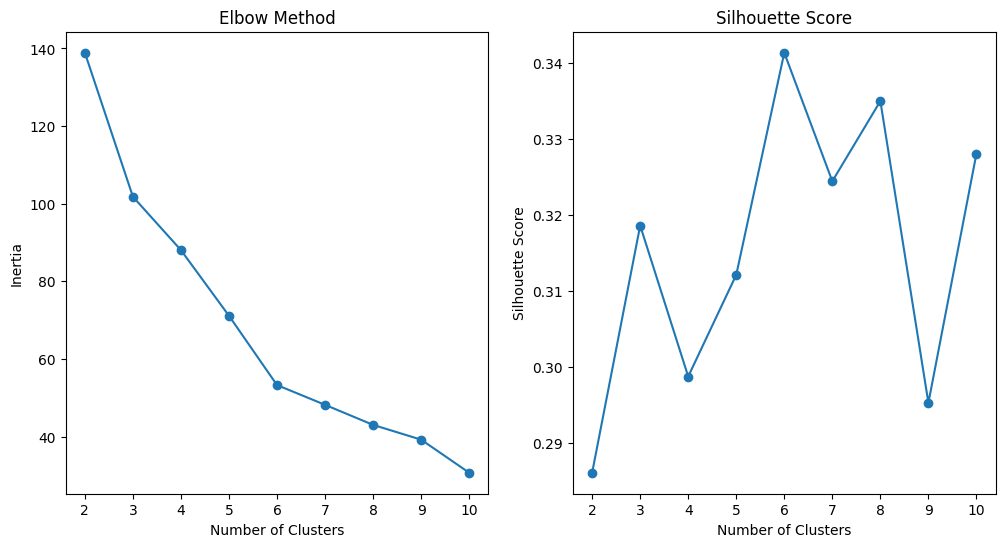

Recommended Exercise: High knees, burpees, at-home HIIT
Recommended Wellness Activity: Meditation, outdoor activities
Recommended Food Intake: Low-sugar fruits, green veggies, grilled chicken
Recommended Water Intake: 3 liters


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Features for clustering
features = ['age', 'weight', 'BMI', 'workout_type']

# Preprocess the data (standardizing the features)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Elbow Method to determine the optimal number of clusters
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

print(inertia)
print(silhouette_scores)

# Plotting the Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.show()

# Optimal number of clusters (based on the elbow and silhouette score, choose 3 for example)
optimal_k = 6

# Fit KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_scaled)

# Assigning cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# New input (e.g., new user data)
new_input = [[20, 75, 27.5, 0]]  # age, weight, BMI, workout_type

# Standardize the new input
new_input_scaled = scaler.transform(new_input)

# Predict which cluster the new input belongs to
predicted_cluster = kmeans.predict(new_input_scaled)

# Find users in the same cluster as the new input
cluster_users = df[df['Cluster'] == predicted_cluster[0]]

# Recommend the most common exercise, wellness activity, food intake, and water intake in this cluster
recommended_exercise = cluster_users['exercise'].mode()[0]
recommended_wellness_activity = cluster_users['wellness_activity'].mode()[0]
recommended_food_intake = cluster_users['food_intake'].mode()[0]
recommended_water_intake = cluster_users['water_intake'].mode()[0]

decoded_exercise = label_encoders['exercise'].inverse_transform([int(recommended_exercise)])[0]
decoded_wellness_activity = label_encoders['wellness_activity'].inverse_transform([int(recommended_wellness_activity)])[0]
decoded_food = label_encoders['food_intake'].inverse_transform([int(recommended_food_intake)])[0]

# Print the recommendations
print(f"Recommended Exercise: {decoded_exercise}")
print(f"Recommended Wellness Activity: {decoded_wellness_activity}")
print(f"Recommended Food Intake: {decoded_food}")
print(f"Recommended Water Intake: {recommended_water_intake} liters")


In [ ]:
predicted_cluster

array([2], dtype=int32)

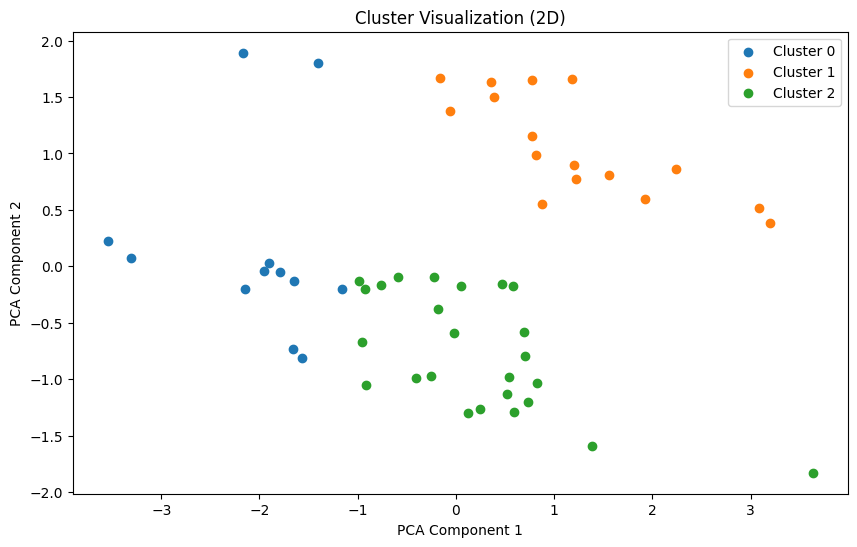

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_points = df_pca[df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Cluster Visualization (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

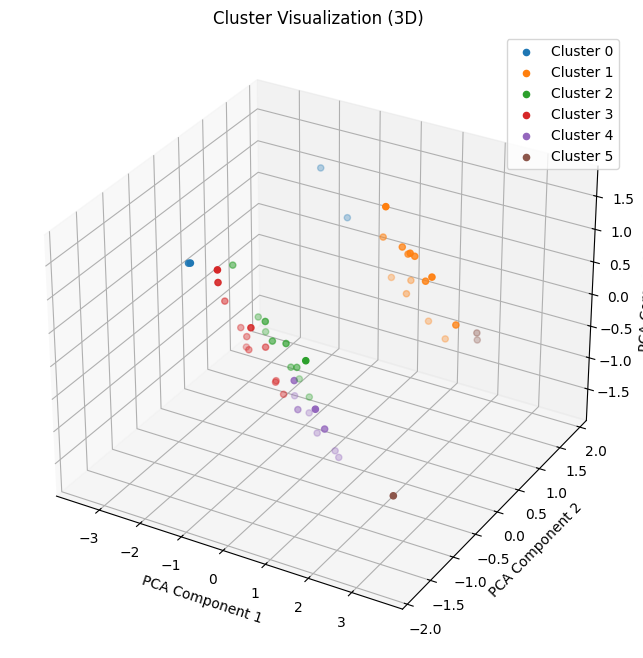

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce dimensions to 3D
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_scaled)

# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(optimal_k):
    cluster_points = df_pca_3d[df['Cluster'] == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster}')

ax.set_title('Cluster Visualization (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
plt.show()
